In [71]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split

In [72]:
geo = pd.read_csv("Geo_scores.csv")
instance = pd.read_csv("instance_scores.csv")
lmbda = pd.read_csv("Lambda_wts.csv")
qset = pd.read_csv("Qset_tats.csv")
test = pd.read_csv("test_share.csv")
train = pd.read_csv("trainx.csv")

In [73]:
print(geo.shape)
print("******************")
print(instance.shape)
print("******************")
print(lmbda.shape)
print("******************")
print(qset.shape)
print("******************")
print(test.shape)
print("******************")
print(train.shape)
print("******************")

(1424035, 2)
******************
(1424035, 2)
******************
(1400, 2)
******************
(1424035, 2)
******************
(56962, 27)
******************
(227845, 28)
******************


In [74]:
print(geo.info())
print("******************")
print(instance.info())
print("******************")
print(lmbda.info())
print("******************")
print(qset.info())
print("******************")
print(test.info())
print("******************")
print(train.info())
print("******************")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
******************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
******************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Group      1400 non-null   object 
 1   lambda_wt  1400 non-null   float64


In [75]:
print(geo.isnull().sum())
print("******************")
print(instance.isnull().sum())
print("******************")
print(lmbda.isnull().sum())
print("******************")
print(qset.isnull().sum())
print("******************")
print(test.isnull().sum())
print("******************")
print(train.isnull().sum())
print("******************")

id               0
geo_score    71543
dtype: int64
******************
id                 0
instance_scores    0
dtype: int64
******************
Group        0
lambda_wt    0
dtype: int64
******************
id                           0
qsets_normalized_tat    103201
dtype: int64
******************
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
dtype: int64
******************
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5    

In [76]:
print(geo.head(2))
print("******************")
print(instance.head(2))
print("******************")
print(lmbda.head(2))
print("******************")
print(qset.head(2))
print("******************")
print(test.head(2))
print("******************")
print(train.head(2))
print("******************")

       id  geo_score
0   26674       4.48
1  204314       4.48
******************
       id  instance_scores
0  173444            -0.88
1  259378             1.50
******************
    Group  lambda_wt
0  Grp936       3.41
1  Grp347      -2.88
******************
       id  qsets_normalized_tat
0    9983                  2.41
1  266000                  3.10
******************
       id   Group      Per1      Per2  Per3      Per4  Per5      Per6  Per7  \
0  146574  Grp229 -0.300000  1.540000  0.22 -0.280000  0.57  0.260000  0.70   
1  268759  Grp141  0.633333  0.953333  0.81  0.466667  0.91  0.253333  1.04   

       Per8  ...      Dem7      Dem8      Dem9     Cred1     Cred2     Cred3  \
0  1.076667  ...  0.786667  0.546667  0.313333  0.703333  0.813333  0.776667   
1  0.550000  ...  0.636667  0.770000  0.993333  0.536667  0.703333  0.806667   

      Cred4     Cred5     Cred6  Normalised_FNT  
0  0.796667  0.823333  0.783333       -249.7500  
1  0.630000  0.673333  0.673333       -249

In [77]:
print("*******************Unique ID to the customer****************")
print("geo",geo['id'].nunique())
print("******************")
print("instance", instance['id'].nunique())
print("******************")
print("qset",qset['id'].nunique())
print("******************")
print("test", test['id'].nunique())
print("******************")
print("train",train['id'].nunique())
print("******************")
print("*******************Unique Group to the customer****************")
print("******************")
print("lmbda",lmbda['Group'].nunique())
print("******************")
print("test",test['Group'].nunique())
print("******************")
print("train",train['Group'].nunique())
print("******************")

*******************Unique ID to the customer****************
geo 284807
******************
instance 284807
******************
qset 284807
******************
test 56962
******************
train 227845
******************
*******************Unique Group to the customer****************
******************
lmbda 1400
******************
test 915
******************
train 1301
******************


In [78]:
print(geo.isnull().sum()/len(geo)*100)
print("******************")
print(qset.isnull().sum()/len(qset)*100)

id           0.000000
geo_score    5.023964
dtype: float64
******************
id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64


<Axes: ylabel='geo_score'>

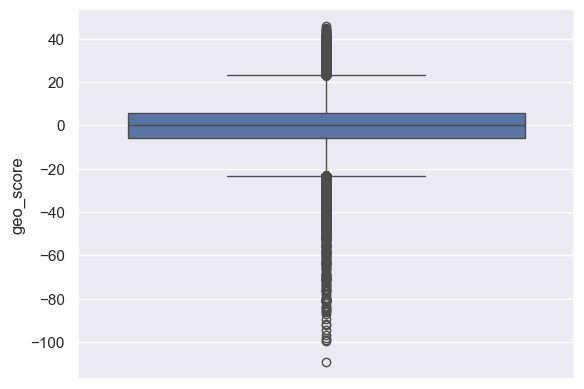

In [79]:
sns.boxplot(y='geo_score', data=geo)

<Axes: ylabel='qsets_normalized_tat'>

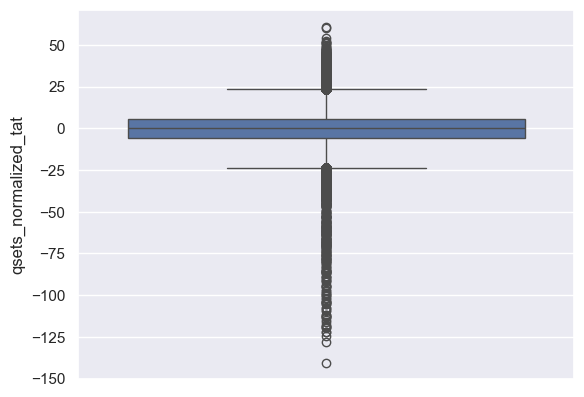

In [80]:
sns.boxplot(y="qsets_normalized_tat", data=qset)

In [81]:
geo['geo_score'] = geo['geo_score'].fillna(geo['geo_score'].median())
qset['qsets_normalized_tat'] = qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

In [82]:
print(geo.isnull().sum()/len(geo)*100)
print("******************")
print(qset.isnull().sum()/len(qset)*100)

id           0.0
geo_score    0.0
dtype: float64
******************
id                      0.0
qsets_normalized_tat    0.0
dtype: float64


In [83]:
train['Target'].value_counts()

Target
0    227451
1       394
Name: count, dtype: int64

In [84]:
train['data'] = 'train'
test['data'] = 'test'

In [85]:
train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0,train


In [86]:
test.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test


In [87]:
# add both the table together
all_data = pd.concat([train, test],axis=0)

In [88]:
all_data.shape

(284807, 29)

In [89]:
all_data


,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test


In [90]:
print("*******************Unique ID to the customer****************")
print("geo",geo['id'].nunique())
print("******************")
print("instance", instance['id'].nunique())
print("******************")
print("qset",qset['id'].nunique())
print("******************")
print("all_data", all_data['id'].nunique())

print("******************")
print("*******************Unique Group to the customer****************")
print("******************")
print("lmbda",lmbda['Group'].nunique())
print("******************")
print("test",test['Group'].nunique())
print("******************")
print("all_data",all_data['Group'].nunique())

*******************Unique ID to the customer****************
geo 284807
******************
instance 284807
******************
qset 284807
******************
all_data 284807
******************
*******************Unique Group to the customer****************
******************
lmbda 1400
******************
test 915
******************
all_data 1400


In [91]:
geo = geo.groupby('id').mean()
instance = instance.groupby('id').mean()
qset = qset.groupby('id').mean()


In [92]:
geo.shape



(284807, 1)

In [93]:
instance.shape

(284807, 1)

In [94]:
qset.shape

(284807, 1)

In [95]:
all_data = pd.merge(all_data, lmbda, on='Group', how='left')

In [96]:
all_data = pd.merge(all_data, instance, on='id', how='left')

In [97]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,instance_scores
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,-0.13,-0.06
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,0.66,0.52
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.51,1.56
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.72,0.70
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.60,-0.47


In [98]:
all_data = pd.merge(all_data, qset, on='id', how='left')

In [99]:
all_data['Group'].nunique()

1400

In [100]:
lmbda['Group'].nunique()

1400

In [101]:
all_data = pd.merge(all_data, geo, on='id', how='left')

In [102]:
all_data.shape

(284807, 33)

In [103]:
train = all_data[all_data['data']=='train']
test = all_data[all_data['data']=='test']

In [104]:
train.shape

(227845, 33)

In [105]:
test.shape

(56962, 33)

In [106]:
test.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'lambda_wt', 'instance_scores',
       'qsets_normalized_tat', 'geo_score'],
      dtype='object')

In [107]:
train = train.drop(['id','data'],axis=1) # Building a model
test = test.drop(['id','data'],axis=1) # Prediction and final result

In [108]:
test = test.drop(['Target'], axis=1)
test.columns

Index(['Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8',
       'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8',
       'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'lambda_wt', 'instance_scores',
       'qsets_normalized_tat', 'geo_score'],
      dtype='object')

In [109]:
unseen_test_data = test.copy()

In [110]:
unseen_test_data.info()
#here group has object data type so we gave to convert in to category then convert in to numbers.

<class 'pandas.core.frame.DataFrame'>
Index: 56962 entries, 227845 to 284806
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Group                 56962 non-null  object 
 1   Per1                  56962 non-null  float64
 2   Per2                  56962 non-null  float64
 3   Per3                  56962 non-null  float64
 4   Per4                  56962 non-null  float64
 5   Per5                  56962 non-null  float64
 6   Per6                  56962 non-null  float64
 7   Per7                  56962 non-null  float64
 8   Per8                  56962 non-null  float64
 9   Per9                  56962 non-null  float64
 10  Dem1                  56962 non-null  float64
 11  Dem2                  56962 non-null  float64
 12  Dem3                  56962 non-null  float64
 13  Dem4                  56962 non-null  float64
 14  Dem5                  56962 non-null  float64
 15  Dem6              

In [111]:
unseen_test_data.head

<bound method NDFrame.head of          Group      Per1      Per2      Per3      Per4      Per5      Per6  \
227845  Grp229 -0.300000  1.540000  0.220000 -0.280000  0.570000  0.260000   
227846  Grp141  0.633333  0.953333  0.810000  0.466667  0.910000  0.253333   
227847  Grp188  1.043333  0.740000  0.860000  1.006667  0.583333  0.616667   
227848  Grp426  1.283333  0.300000  0.576667  0.636667  0.256667  0.543333   
227849  Grp443  1.186667  0.326667  0.476667  0.866667  0.436667  0.680000   
...        ...       ...       ...       ...       ...       ...       ...   
284802  Grp102  0.553333  1.043333  1.096667  0.686667  0.673333  0.340000   
284803  Grp504  1.353333  0.616667  0.276667  0.783333  0.690000  0.650000   
284804   Grp78  1.083333  0.433333  0.806667  0.490000  0.243333  0.316667   
284805  Grp134  0.566667  1.153333  0.370000  0.616667  0.793333  0.226667   
284806   Grp18  1.426667  0.110000 -0.006667 -0.200000  0.983333  1.870000   

            Per7      Per8      P

In [112]:
unseen_test_data['Group'] = unseen_test_data['Group'].astype('category')
unseen_test_data['Group'] = unseen_test_data['Group'].cat.codes
unseen_test_data['Group']

227845    277
227846    180
227847    231
227848    485
227849    504
         ... 
284802     11
284803    569
284804    765
284805    163
284806    222
Name: Group, Length: 56962, dtype: int16

In [113]:
train['Group'] = train['Group'].astype('category')
train['Group'] = train['Group'].cat.codes

In [114]:
x = train.drop(['Target'], axis=1)
y = train['Target']

In [115]:
y.value_counts(normalize=True)

Target
0.0    0.998271
1.0    0.001729
Name: proportion, dtype: float64

In [116]:
train['Target'].value_counts()

Target
0.0    227451
1.0       394
Name: count, dtype: int64

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101,stratify=y)

In [118]:
y_train.value_counts()

Target
0.0    181961
1.0       315
Name: count, dtype: int64

In [119]:
y_test.value_counts()

Target
0.0    45490
1.0       79
Name: count, dtype: int64

In [120]:
# Building Model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [121]:
y_pred_train = rfmodel.predict(x_train)
y_pred_test = rfmodel.predict(x_test)

In [122]:
from sklearn.metrics import classification_report, accuracy_score

In [123]:
print(classification_report(y_train, y_pred_train))
print("*****************")
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

*****************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.95      0.72      0.82        79

    accuracy                           1.00     45569
   macro avg       0.97      0.86      0.91     45569
weighted avg       1.00      1.00      1.00     45569



In [124]:
print(accuracy_score(y_train, y_pred_train))
print("*****************")
print(accuracy_score(y_test, y_pred_test))

1.0
*****************
0.9994513814215804


In [125]:
final_output = rfmodel.predict(unseen_test_data)

In [126]:
final_output

array([0., 0., 0., ..., 0., 0., 0.], shape=(56962,))

In [127]:
final_output = pd.DataFrame(final_output)
final_output.columns

RangeIndex(start=0, stop=1, step=1)

In [128]:
unseen_test_data.shape

(56962, 30)

In [129]:
final_output.shape

(56962, 1)

In [130]:
final_output.to_csv("Final_Target_Value.csv")
# here we do these code -: it create a new file in this jupiternote book on the name of given data.

In [131]:
final_output.value_counts()

0  
0.0    56879
1.0       83
Name: count, dtype: int64

In [132]:
print( list(unseen_test_data.columns))

['Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6', 'Normalised_FNT', 'lambda_wt', 'instance_scores', 'qsets_normalized_tat', 'geo_score']


# pickling the model file for deployment

In [133]:
import pickle

In [134]:
pickle.dump(rfmodel, open('rfmodel.pkl', 'wb'))

In [135]:
pickled_model=pickle.load(open('rfmodel.pkl', 'rb'))

In [136]:
pickled_model.predict(unseen_test_data)

array([0., 0., 0., ..., 0., 0., 0.], shape=(56962,))

In [137]:

print( list(unseen_test_data.columns))

['Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6', 'Normalised_FNT', 'lambda_wt', 'instance_scores', 'qsets_normalized_tat', 'geo_score']
